In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # 导入 seaborn 并且命名为sns
sns.set(style="darkgrid") # 设置绘图格式为darkgrid
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


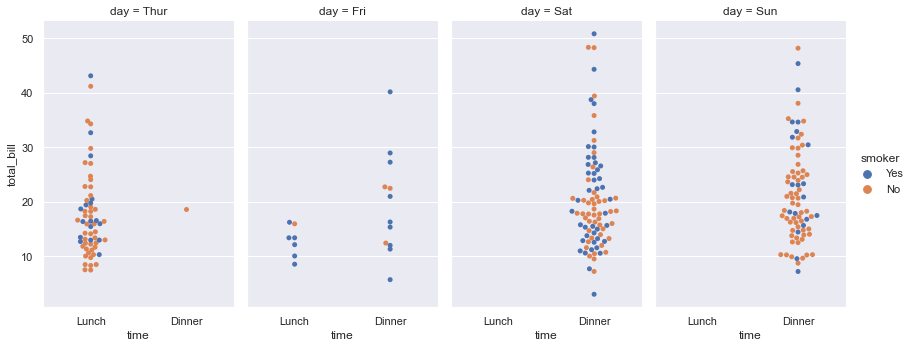

In [2]:
sns.catplot(x="time", y="total_bill", hue="smoker",
            col="day", aspect=.6,
            kind="swarm", data=tips);

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
sns.set(color_codes=True)

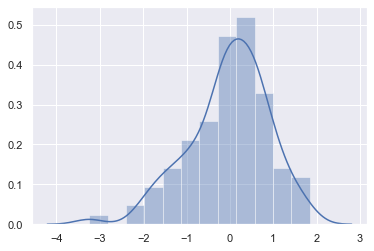

In [5]:
x = np.random.normal(size =100)
sns.distplot(x);

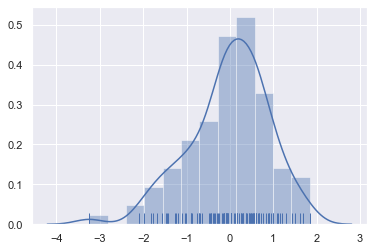

In [6]:
sns.distplot(x, kde=True, rug=True);

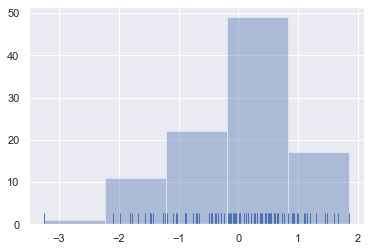

In [7]:
sns.distplot(x, bins=5, kde=False, rug=True);

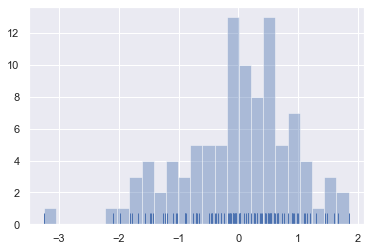

In [8]:
sns.distplot(x, bins=25, kde=False, rug=True);

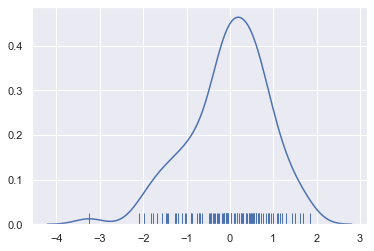

In [9]:
sns.distplot(x, hist=False, rug=True,kde = True);

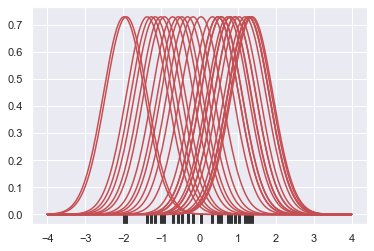

In [10]:
x = np.random.normal(0, 1, size=30)   # 生成中心在0，scale为1，30维的正态分布数据 
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.) # 确定带宽
support = np.linspace(-4, 4, 200)  
kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")
sns.rugplot(x, color=".2", linewidth=3);

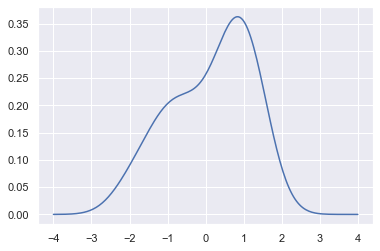

In [11]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support) # 使用梯形积分计算曲线下面积，然后归一化
plt.plot(support, density);

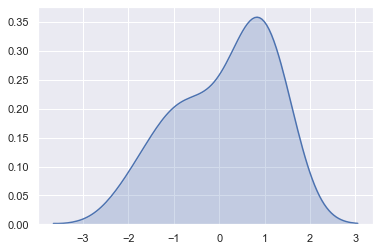

In [12]:
sns.kdeplot(x, shade=True);

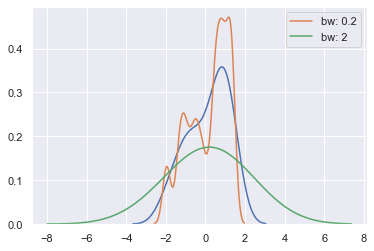

In [13]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

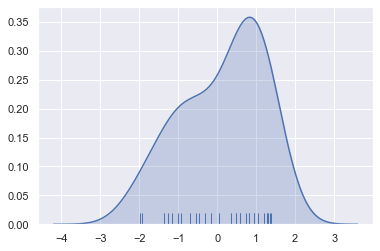

In [14]:
sns.kdeplot(x, shade=True, cut=4)
sns.rugplot(x);

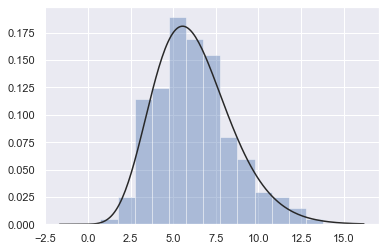

In [15]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma); # 是用gamma分布拟合，并可视化

In [16]:
mean = [0, 1]
cov = [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

In [17]:
df.head()

,x,y
0,1.727228,2.334394
1,0.345385,1.095163
2,2.292262,1.871368
3,-1.774170,-0.654064
4,-0.459878,0.238933


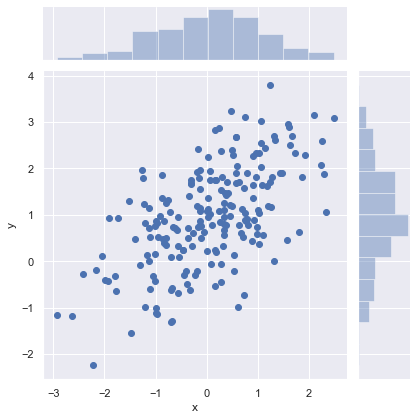

In [18]:
sns.jointplot(x="x", y="y", data=df);

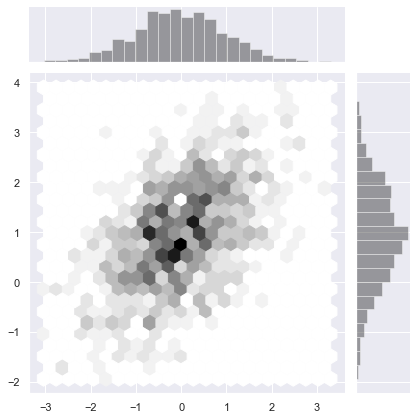

In [19]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x, y=y, kind="hex", color="k");
# with sns.axes_style("white"):
#     sns.jointplot(x=x, y=y, kind="hex", color="k");

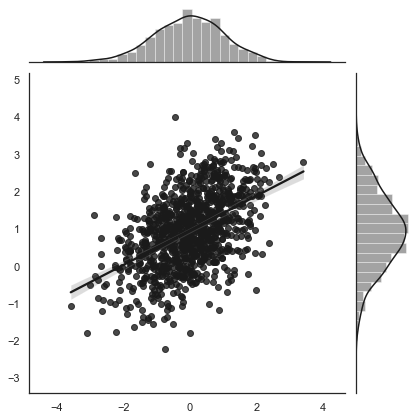

In [20]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="reg", color="k");

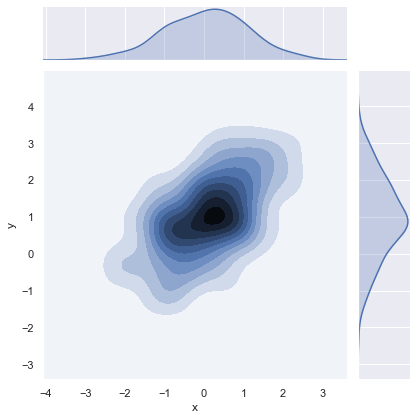

In [21]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

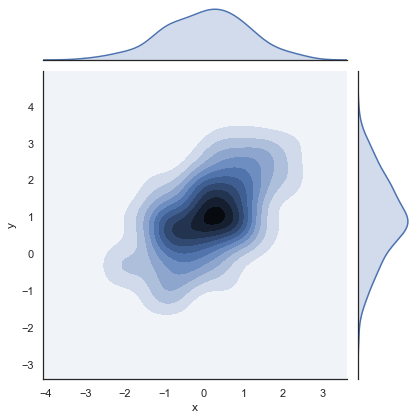

In [22]:
with sns.axes_style("white"):
    sns.jointplot(x="x", y="y", data=df, kind="kde");

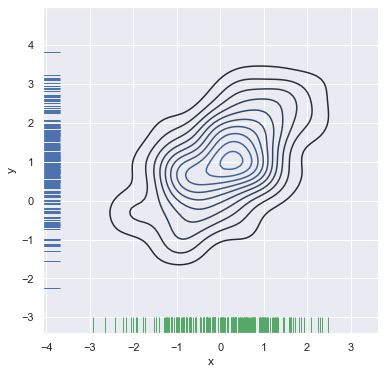

In [23]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

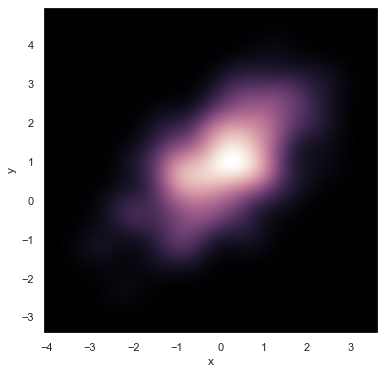

In [24]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=509, shade=True);

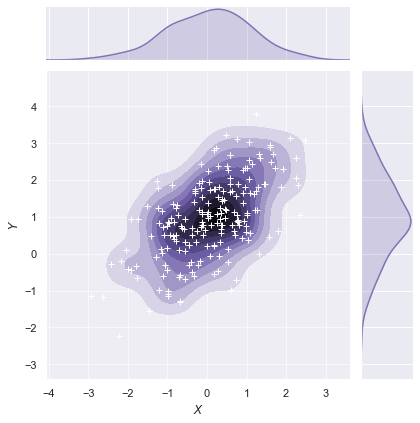

In [25]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0.5)
g.set_axis_labels("$X$", "$Y$");

In [26]:
# iris = sns.load_dataset('iris')
# sns.pairplot(iris);

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
sns.set(color_codes=True)

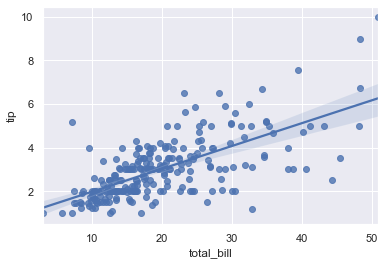

In [29]:
sns.regplot(x="total_bill", y="tip", data=tips);

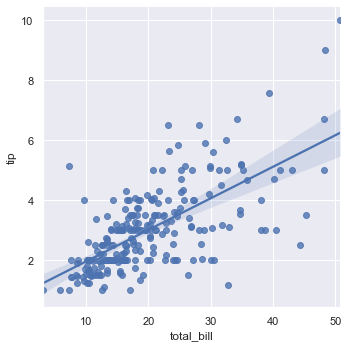

In [30]:
sns.lmplot(x="total_bill", y="tip", data=tips);

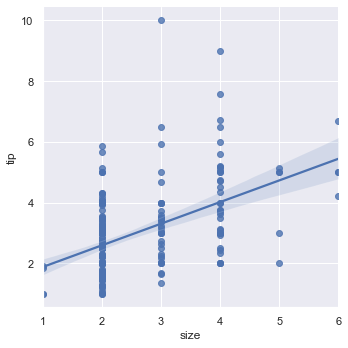

In [31]:
sns.lmplot(x="size", y="tip", data=tips);

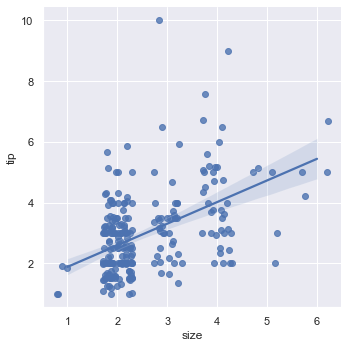

In [32]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.3);

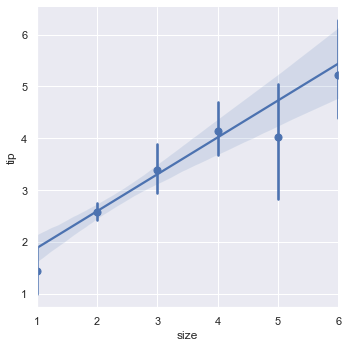

In [33]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

In [34]:
anscombe = sns.load_dataset("anscombe")
# anscombe = pd.read_csv('/home/kesci/input/Seaborn_Demo6897/anscombe.csv')

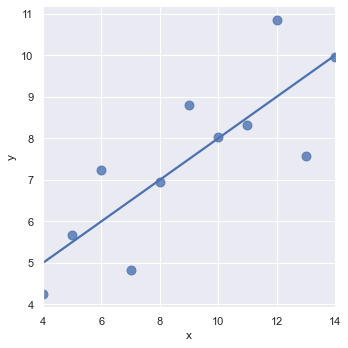

In [35]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

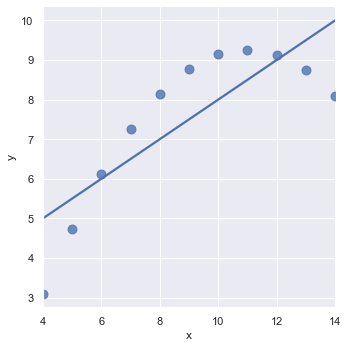

In [36]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

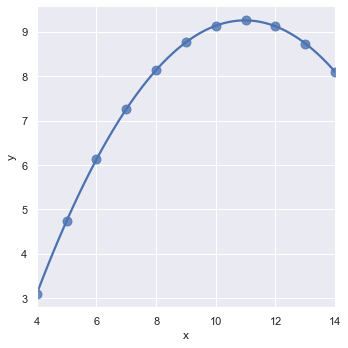

In [37]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

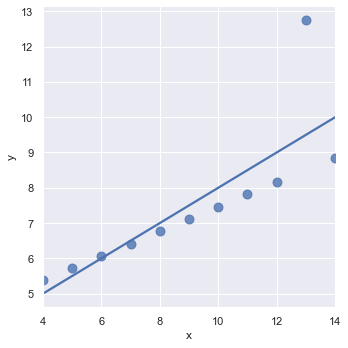

In [38]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

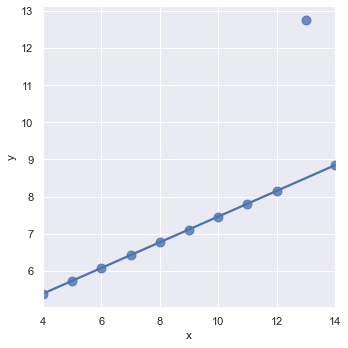

In [39]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

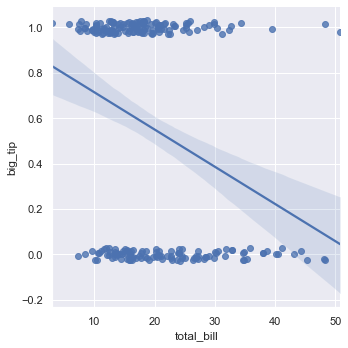

In [40]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

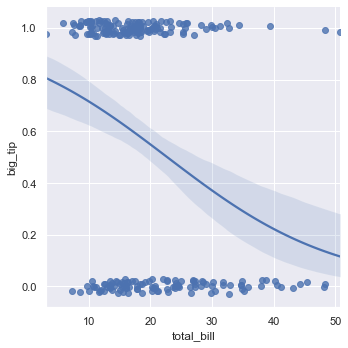

In [41]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

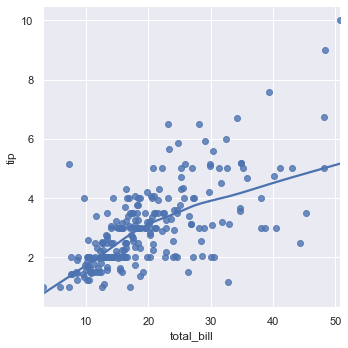

In [42]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

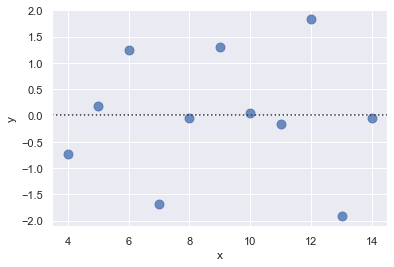

In [43]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

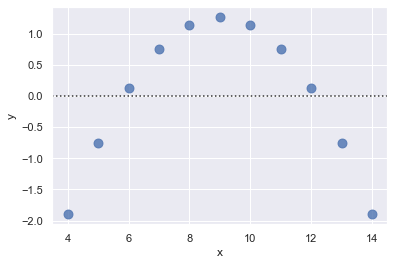

In [44]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

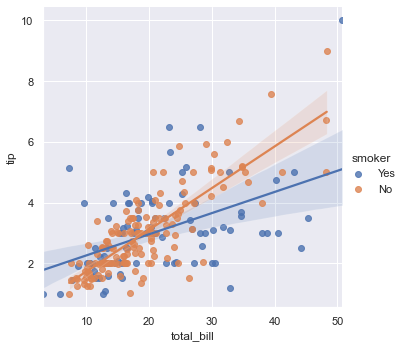

In [45]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

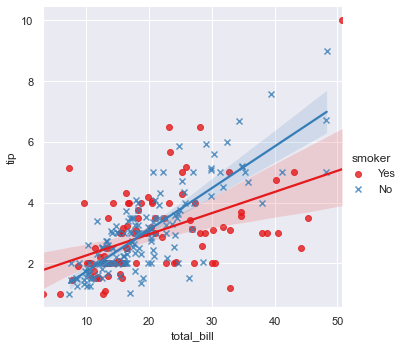

In [46]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

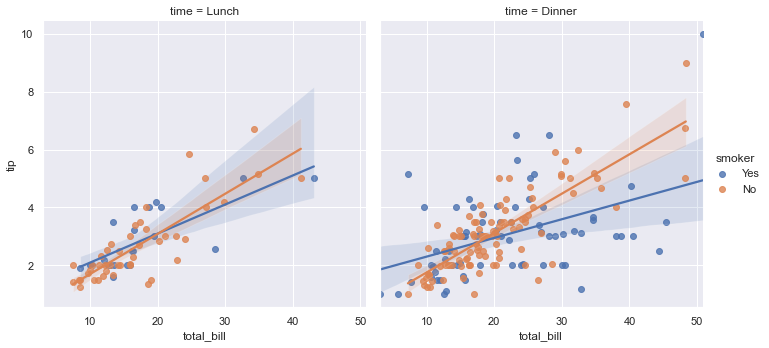

In [47]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

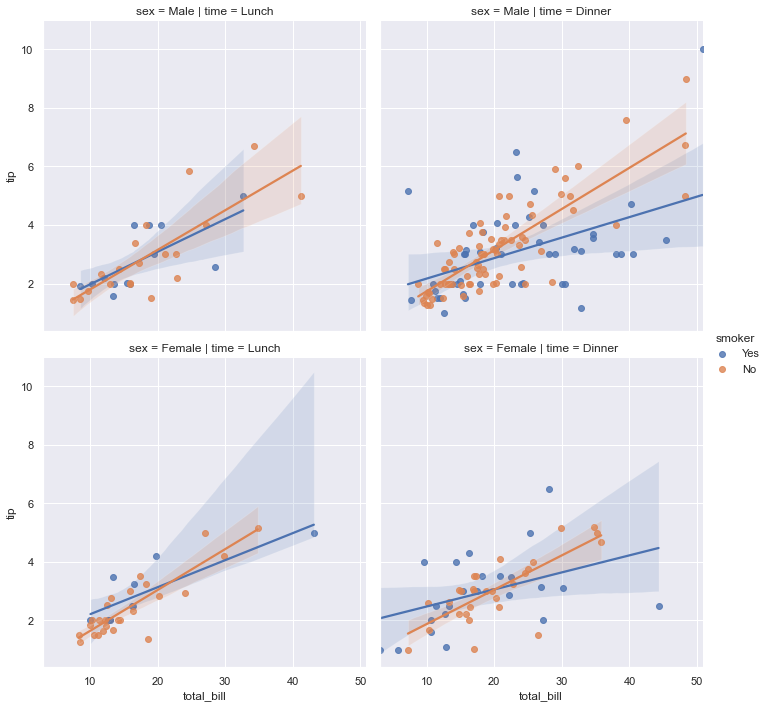

In [48]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

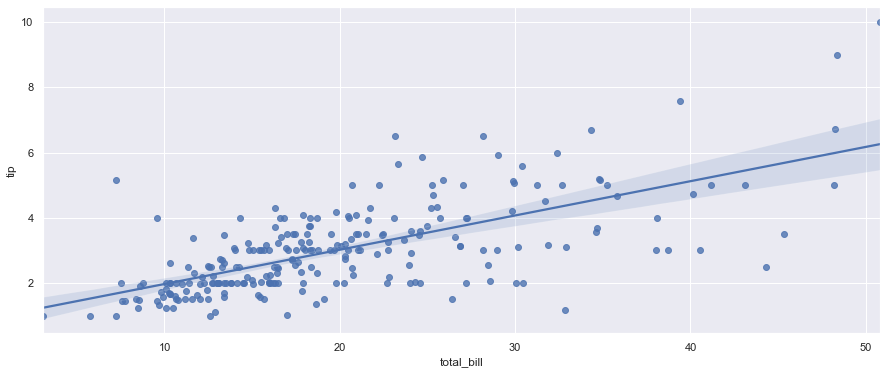

In [49]:
f, ax = plt.subplots(figsize=(15, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

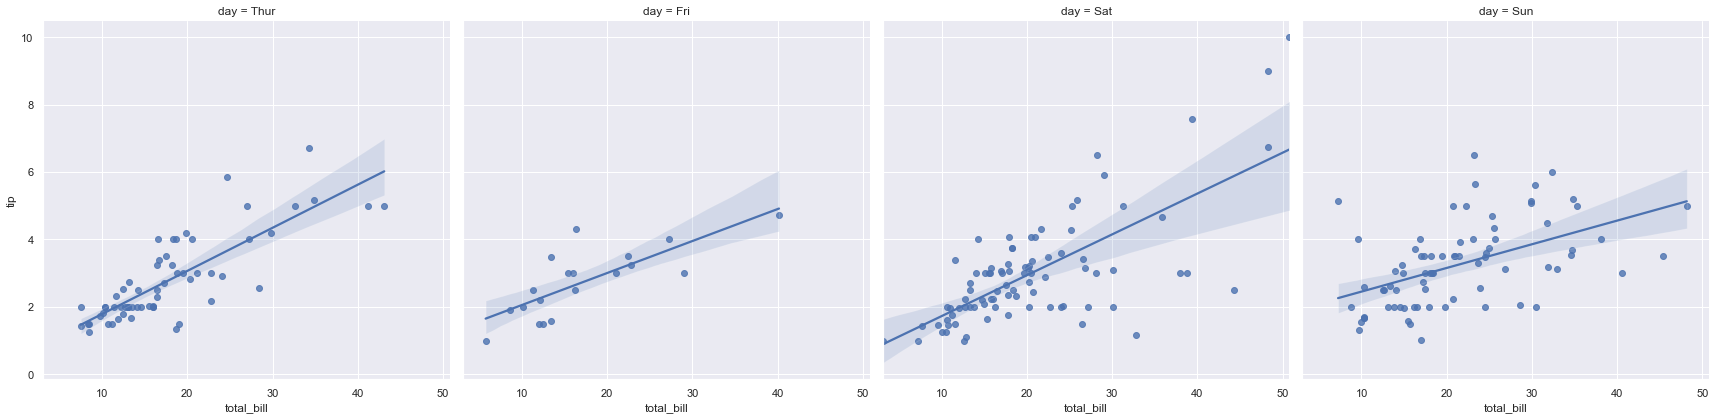

In [50]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,height=6);

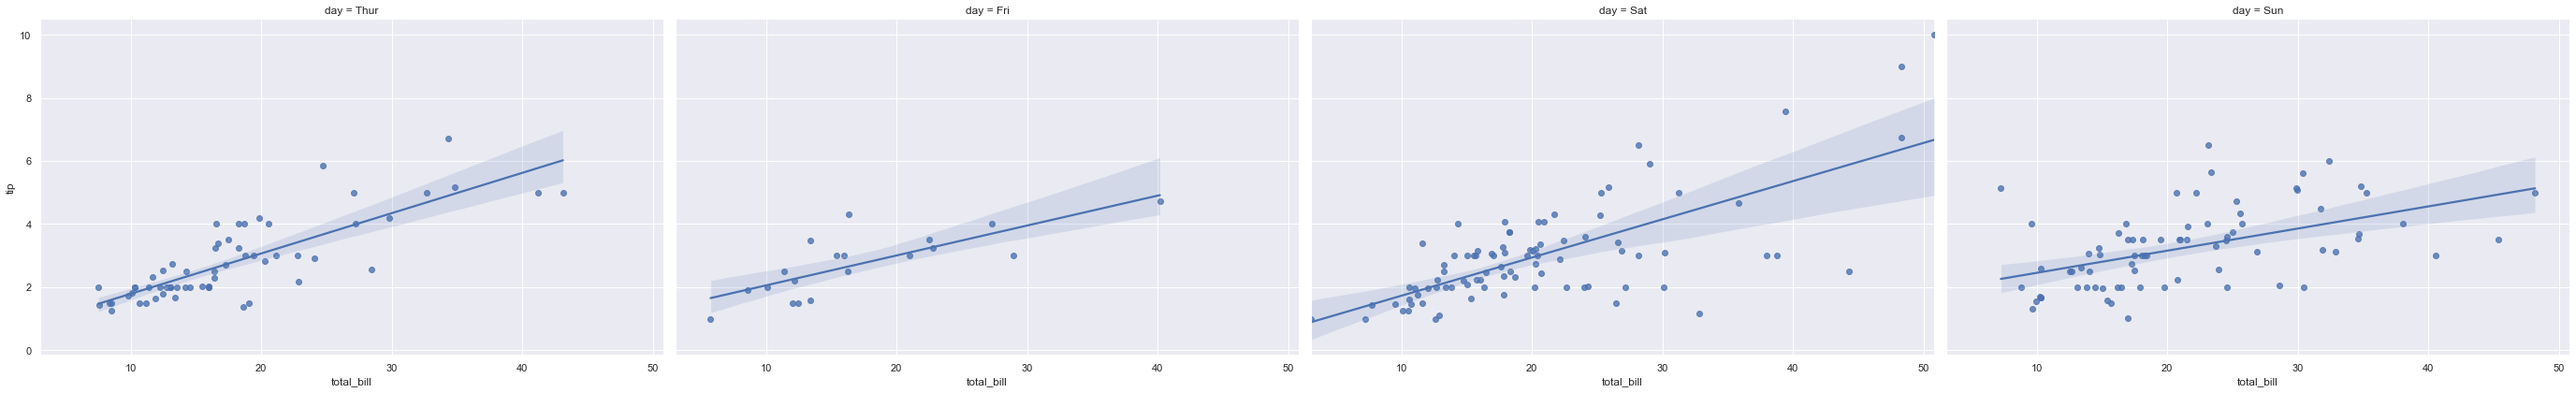

In [51]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,height=6,
           aspect=1.6);

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

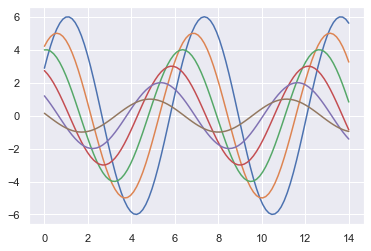

In [54]:
sinplot()

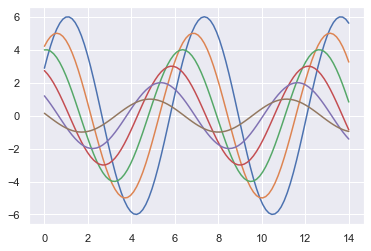

In [55]:
sns.set()
sinplot()

In [56]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

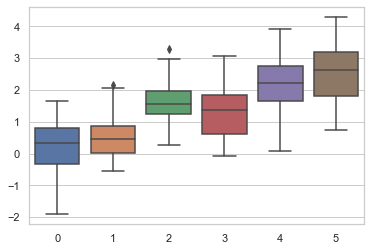

In [57]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

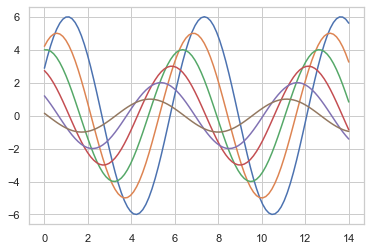

In [58]:
sns.set_style("whitegrid")
sinplot()

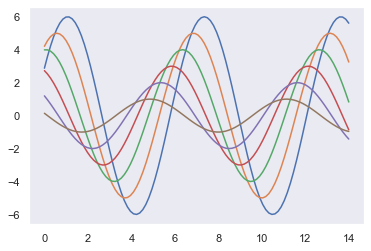

In [59]:
sns.set_style("dark")
sinplot()

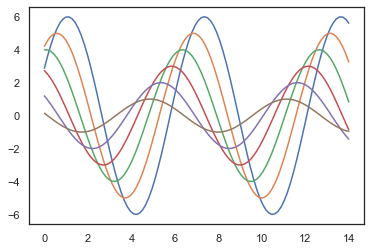

In [60]:
sns.set_style("white")
sinplot()

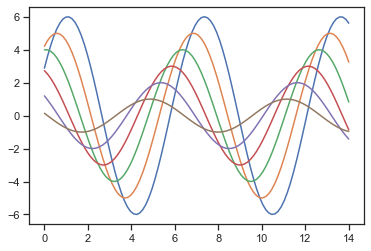

In [61]:
sns.set_style("ticks")
sinplot()

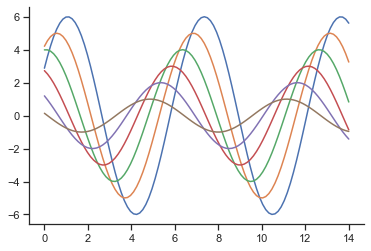

In [62]:
sinplot()
sns.despine()

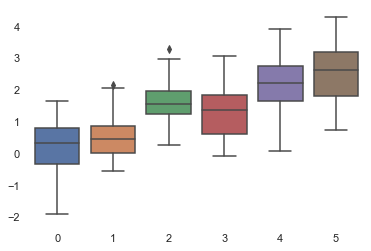

In [63]:
sns.set_style("white")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True,bottom=True)

In [64]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

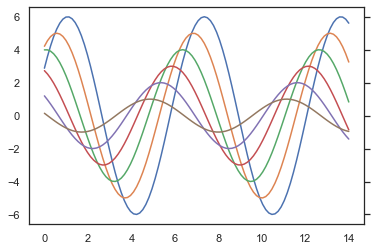

In [65]:
sns.set_style("white", {"ytick.right": True,'axes.grid':False})
sinplot()